In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

/Users/animesh/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Load Data and EDA

data source: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/

In [2]:
col_names = ['age', 'workclass', 'fnlwgt','education', 'education-num', 
'marital-status', 'occupation', 'relationship', 'race', 'sex',
'capital-gain','capital-loss', 'hours-per-week','native-country', 'income']
df = pd.read_csv('adult.data',header = None, names = col_names)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.workclass.unique(), df.occupation.unique(), df.income.unique()

(array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
        ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
        ' Never-worked'], dtype=object),
 array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
        ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
        ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
        ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
        ' Priv-house-serv'], dtype=object),
 array([' <=50K', ' >50K'], dtype=object))

In [5]:
#Clean columns by stripping extra whitespace for columns of type "object"
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c].str.strip()
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
# Check Class Imbalance

df.income.value_counts(normalize = True)

<=50K    0.75919
>50K     0.24081
Name: income, dtype: float64

In [7]:
# Create feature dataframe X with feature columns and dummy variables for categorical features
feature_cols = ['age','capital-gain', 'capital-loss', 'hours-per-week', 'sex','race', 'hours-per-week', 'education']

df_dummies = df[feature_cols]
X = pd.get_dummies(df_dummies, drop_first=True)

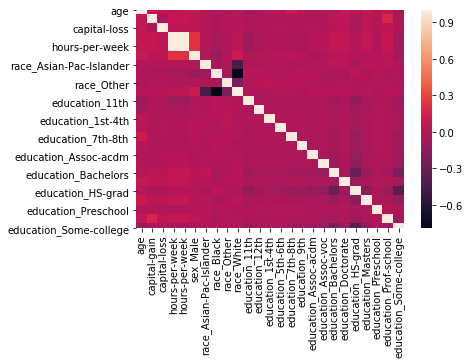

In [8]:
# Check logistic regression assumption: feature correlation
plt.figure()
sns.heatmap(X.corr())#, annot=True)
plt.show()
plt.close()

#### Output labels, Column income

In [9]:
y = np.where(df.income=='<=50K', 0, 1)

## Model

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=.2)

model = LogisticRegression(C=0.05, penalty='l1', solver='liblinear')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [11]:
# Print model parameters and coefficients
print('Model Parameters, Intercept:')
print(model.intercept_[0])
print('Model Parameters, Coeff:')
print(model.coef_)

Model Parameters, Intercept:
-5.635355768129185
Model Parameters, Coeff:
[[ 3.69476517e-02  3.14974749e-04  6.66725366e-04  2.77192323e-02
   4.61596941e-03  1.03453632e+00  0.00000000e+00 -3.29316313e-01
   0.00000000e+00  1.05174170e-01 -5.72446065e-01  0.00000000e+00
   0.00000000e+00 -3.98774164e-01 -8.96883827e-01 -5.00877729e-01
   5.75787450e-01  5.51411394e-01  1.28660714e+00  1.80048679e+00
   0.00000000e+00  1.60230090e+00  0.00000000e+00  1.82559932e+00
   3.88213530e-01]]


In [12]:
# Evaluate the predictions of the model on the test set. Print the confusion matrix and accuracy score.
print('Confusion Matrix on test set:')
print(confusion_matrix(y_test, y_pred))
print(f'Accuracy Score on test set: {model.score(x_test, y_test)}')

Confusion Matrix on test set:
[[4773  253]
 [ 880  607]]
Accuracy Score on test set: 0.826040227237832


In [13]:
# Create new DataFrame of the model coefficients and variable names; sort values based on coefficient
coef_df = pd.DataFrame(zip(x_train.columns, model.coef_[0]), columns=['var', 'coef']).sort_values('coef')
coef_df = coef_df[coef_df.coef.abs()>0].sort_values('coef')
coef_df

,var,coef
14,education_7th-8th,-0.896884
10,education_11th,-0.572446
15,education_9th,-0.500878
13,education_5th-6th,-0.398774
7,race_Black,-0.329316
1,capital-gain,0.000315
2,capital-loss,0.000667
4,hours-per-week,0.004616
3,hours-per-week,0.027719
0,age,0.036948


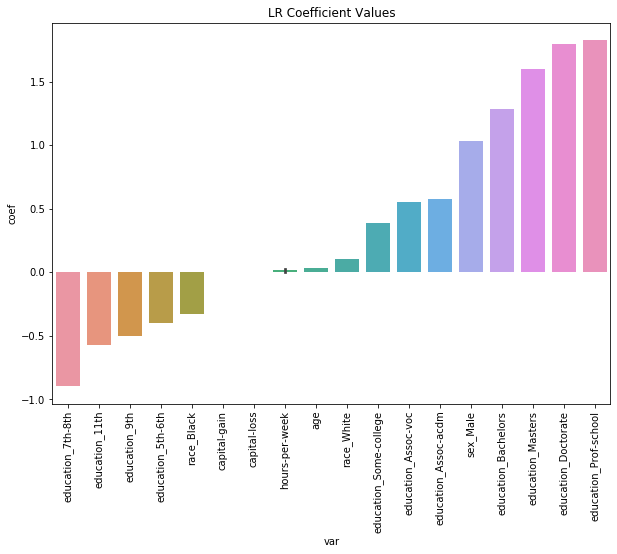

In [14]:
# barplot of the coefficients sorted in ascending order
plt.figure(figsize = (10,7))
sns.barplot(data=coef_df, x='var', y='coef')
plt.xticks(rotation=90);
plt.title('LR Coefficient Values')
plt.show()
plt.close()

### ROC

In [15]:
y_pred_prob = model.predict_proba(x_test)
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])
print(f'ROC AUC score: {roc_auc}')

ROC AUC score: 0.8457400133963778


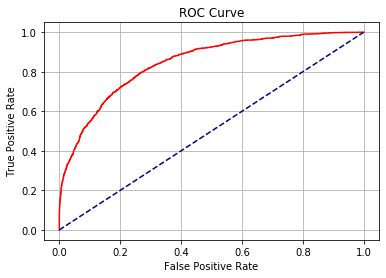

In [16]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
plt.plot(fpr,tpr, color = 'red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1],[0,1], color='navy',linestyle='--')
plt.title('ROC Curve')
plt.grid()
plt.show()